# **DOCUMENT VERIFICATION USING CONVOLUTIONAL NEURAL NETWORK (CNN)**

Convolutional Neural Networks (CNNs) are implemented for document verification in the code for classification whether the document is valid or invalid. Here, there is alsoo  importing of the required libraries, including Keras and TensorFlow, in the first step. Next, train, valid, and test datasets are preprocessed and enhanced using data generator configurations. The code loads and augments picture data using the flow_from_directory method, with the paths to the dataset directories supplied. Next, convolutional layers, max pooling layers, thick layers, and dropout are built into a CNN model for regularization. The model is assembled, trained on the training set, then evaluated on the test set.

# Importing the necessary libraries

In [2]:
# Importing Necessary Libraries

import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np


# Setting up data generators

Data generators are set up using ImageDataGenerator to preprocess and augment the training, validation, and test datasets. rescale=1./255 normalizes pixel values to the range [0, 1].

In [3]:
# Setting Up Data Generators
# pixel reduce 

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# Define Dataset Paths

Specifying the paths to the train, valid, and test datasets. Adjusting these paths based on the location of dataset.


In [4]:
# Adjust these paths to where datasets are located

train_dir = r"/kaggle/input/verification-dataset/train"
valid_dir = r"/kaggle/input/verification-dataset/valid"
test_dir = r"/kaggle/input/verification-dataset/test"


# Flow from Directory and Getting Sample Counts

Utilizing the flow_from_directory method to load and augment image data from directories. This includes setting target size, batch size, and class mode for binary classification.


In [5]:
# Flow from directory and getting the count of samples for the training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resizes images to a consistent size
    batch_size= 32,  # Number of images per batch during training / hyper paramaters 
    class_mode='binary',  # Binary classification task (valid or invalid document) {Labeled data sets}
    classes=['']  # Set classes to an empty list for no subdirectories
)
train_count = len(train_generator.filenames)  # Count the total number of training samples

# Flow from directory and get the count of samples for the validation set
validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32, #hyperparameters
    class_mode='binary',
    classes=['']
)
valid_count = len(validation_generator.filenames)  # Count the total number of validation samples

# Flow from directory and get the count of samples for the test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    classes=['']
)
test_count = len(test_generator.filenames)  # Count the total number of test samples


Found 276 images belonging to 1 classes.
Found 28 images belonging to 1 classes.
Found 14 images belonging to 1 classes.


# Printing Dataset Counts and Paths

Printing the counts of samples in the train, valid, and test sets for verification. This is crucial for ensuring that the data has been loaded correctly.

In [6]:
# Printing counts and paths for verification

print(f"Training set count: {train_count}")
print(f"Validation set count: {valid_count}")
print(f"Test set count: {test_count}")


Training set count: 276
Validation set count: 28
Test set count: 14


# Building Convolutional Neural Network (CNN) Model

Defining a CNN model with convolutional layers, max pooling layers, flattening, dense layers, and dropout for regularization.

In [7]:
# Build CNN Model using Sequential API
model = Sequential([
    # Convolutional layer with 32 filters, each of size (3, 3), using 'relu' activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), #input layer (3,3 = 3*3 matrix) 32 number of filters 150*150 pixels with 3 rgb color
    MaxPooling2D(2, 2),#hidden layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),# Flatten layer to transform the 3D output to 1D
    Dense(512, activation='relu'),
    Dropout(0.5), #hyperparameters
    Dense(1, activation='sigmoid')# Output layer with 1 unit and 'sigmoid' activation for binary classification
])


# Compiling the model

Compiling the model by specifying the loss function, optimizer, and evaluation metric. In this case, binary crossentropy is used for binary classification, and the Adam optimizer is employed.

In [8]:
# Compiling the Model

model.compile(loss='binary_crossentropy',#random guessing error guessing  using crossentropy alogrithim binary_crossentropy means difference between perdicted probality and true binary distruuution
              optimizer='adam', #adam is used for managing weights and biases
              metrics=['accuracy']) #monitoring the performance during the traiing and testing


# Training the model

Training the model using the fit method. Specifying the train data, number of epochs, and valid data.

In [9]:
# Train the Model

history = model.fit(
    train_generator,
    epochs=20, #hyperparameters  (Random guessing ) kati choti guess garney
    validation_data=validation_generator
)


Epoch 1/20
9/9 [==============================] - 11s 1s/step - loss: 0.0764 - accuracy: 0.9710 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
9/9 [==============================] - 9s 928ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
9/9 [==============================] - 9s 975ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
9/9 [==============================] - 8s 918ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
9/9 [==============================] - 8s 918ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
9/9 [==============================] - 9s 965ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 8s 906ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.00

# Evaluating the Model

Evaluating the trained model on the test set and print the test accuracy and loss.

In [10]:
# Evaluating the model

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)


1/1 [==============================] - 0s 172ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0
Test loss: 0.0


# Predicting on the Test Images

Iterating through the images in the test set, preprocessing each image, making predictions using the trained model, and print whether the document is predicted as valid or invalid.

In [11]:
# Predicting on Test Images

# Iterate over sorted list of test images
for i, img_name in enumerate(sorted(os.listdir(test_dir)), 1):
    img_path = os.path.join(test_dir, img_name)
    
    # Load and preprocess the test image
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.  # Model expects input in the range [0, 1]

    # Make predictions using the trained model
    prediction = model.predict(img_tensor)
    
    # Display predictions 0 means 100percent valid 1 means 100 percent invalid
    if prediction[0][0] >= 0.5:
        print(f"{i}. {img_name}: Invalid")
    else:
        print(f"{i}. {img_name}: Valid")


1/1 [==============================] - 0s 150ms/step
1. 0c0584201ff552c4bdcbe160315aa432_jpg.rf.38c69d7b3bc27683421393f3de7cea00.jpg: Valid
1/1 [==============================] - 0s 35ms/step
2. 0d4c873ace54e82fb49c451a9bdc6d24_jpg.rf.50197bb3c79f9ee52d58e8d401530ff9.jpg: Valid
1/1 [==============================] - 0s 36ms/step
3. 0e0a5204f238d9c743ae456a8dc6529a_jpg.rf.4b93cc4b6be8409a023fd3e6c00328d8.jpg: Valid
1/1 [==============================] - 0s 37ms/step
4. 1c89969c27b6f7ea57d47a74f579b5cc-2-_jpg.rf.799bfeec51e895fd5918e338d84b45e9.jpg: Valid
1/1 [==============================] - 0s 38ms/step
5. a1e3125efaa4eebd8efc907ae48b69a1-1-_jpg.rf.b75df3b8969dfb444c0a921307499fdf.jpg: Valid
1/1 [==============================] - 0s 41ms/step
6. adhar1_2366193f_jpg.rf.3123d2af372935b0111ab01fc8d702a8.jpg: Valid
1/1 [==============================] - 0s 38ms/step
7. b0d100d4275f891c2fbc6d9d56dbd123_jpg.rf.f74c1f4b48412cf6d43e07d2e6a84730.jpg: Valid
1/1 [==============================] 

# CONCLUSION:

The CNN model is designed for binary classification (valid or invalid documents), and the dataset is split into train, valid, and test sets. After training the model for 20 epochs, it is evaluated on a test set consisting of valid documents. This output suggests that the model predicted all documents in the test set to be valid.

# PLOTTING IN THE GRAPH

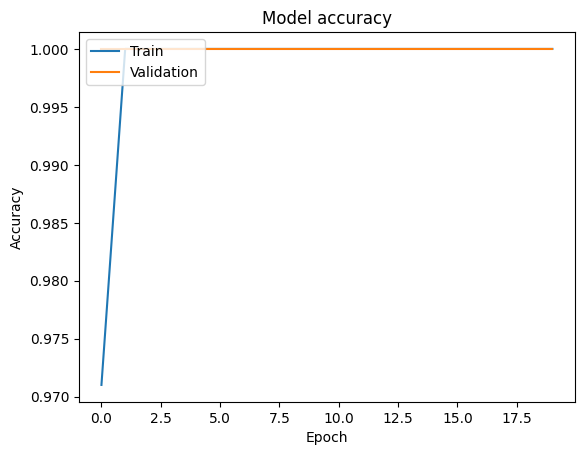

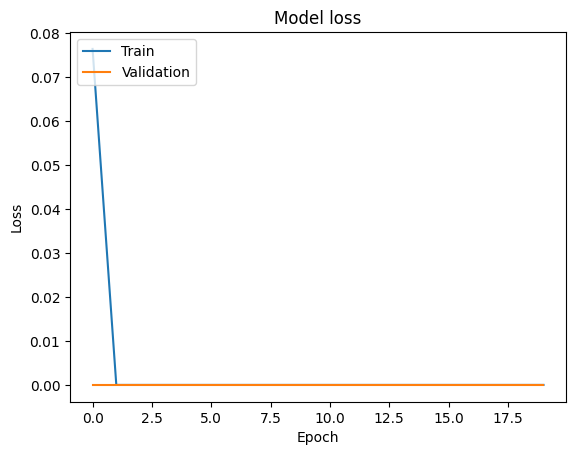

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
